# Défi : Analyser un texte sur la science des données

> *Dans ce notebook, nous expérimentons avec l'utilisation d'une URL différente - un article Wikipédia sur l'apprentissage automatique. Vous pouvez constater que, contrairement à la science des données, cet article contient de nombreux termes, rendant ainsi l'analyse plus problématique. Nous devons trouver une autre méthode pour nettoyer les données après l'extraction des mots-clés, afin d'éliminer certaines combinaisons de mots fréquentes mais peu significatives.*

Dans cet exemple, faisons un exercice simple qui couvre toutes les étapes d'un processus traditionnel de science des données. Vous n'avez pas besoin d'écrire de code, il vous suffit de cliquer sur les cellules ci-dessous pour les exécuter et observer le résultat. En guise de défi, vous êtes encouragé à essayer ce code avec des données différentes.

## Objectif

Dans cette leçon, nous avons discuté de différents concepts liés à la science des données. Essayons de découvrir d'autres concepts connexes en faisant un peu de **text mining**. Nous commencerons par un texte sur la science des données, en extrairons des mots-clés, puis tenterons de visualiser le résultat.

Comme texte, j'utiliserai la page sur la science des données de Wikipédia :


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Étape 1 : Obtenir les données

La première étape de tout processus de science des données consiste à obtenir les données. Nous utiliserons la bibliothèque `requests` pour cela :


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Étape 2 : Transformer les données

L'étape suivante consiste à convertir les données dans un format adapté au traitement. Dans notre cas, nous avons téléchargé le code source HTML de la page, et nous devons le convertir en texte brut.

Il existe de nombreuses façons de procéder. Nous utiliserons l'objet [HTMLParser](https://docs.python.org/3/library/html.parser.html) intégré le plus simple de Python. Nous devons créer une sous-classe de la classe `HTMLParser` et définir le code qui collectera tout le texte à l'intérieur des balises HTML, à l'exception des balises `<script>` et `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Étape 3 : Obtenir des informations

L'étape la plus importante consiste à transformer nos données en une forme à partir de laquelle nous pouvons tirer des informations. Dans notre cas, nous voulons extraire des mots-clés du texte et identifier lesquels sont les plus significatifs.

Nous utiliserons une bibliothèque Python appelée [RAKE](https://github.com/aneesha/RAKE) pour l'extraction de mots-clés. Tout d'abord, installons cette bibliothèque si elle n'est pas déjà présente :


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


La fonctionnalité principale est disponible à partir de l'objet `Rake`, que nous pouvons personnaliser à l'aide de certains paramètres. Dans notre cas, nous définirons la longueur minimale d'un mot-clé à 5 caractères, la fréquence minimale d'un mot-clé dans le document à 3, et le nombre maximal de mots dans un mot-clé à 2. N'hésitez pas à expérimenter avec d'autres valeurs et à observer le résultat.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Nous avons obtenu une liste de termes accompagnés de leur degré d'importance. Comme vous pouvez le constater, les disciplines les plus pertinentes, telles que le machine learning et le big data, figurent en tête de liste.

## Étape 4 : Visualisation du résultat

Les données sont souvent mieux comprises sous une forme visuelle. Il est donc souvent judicieux de les visualiser afin d'en tirer des enseignements. Nous pouvons utiliser la bibliothèque `matplotlib` en Python pour tracer une distribution simple des mots-clés avec leur pertinence :


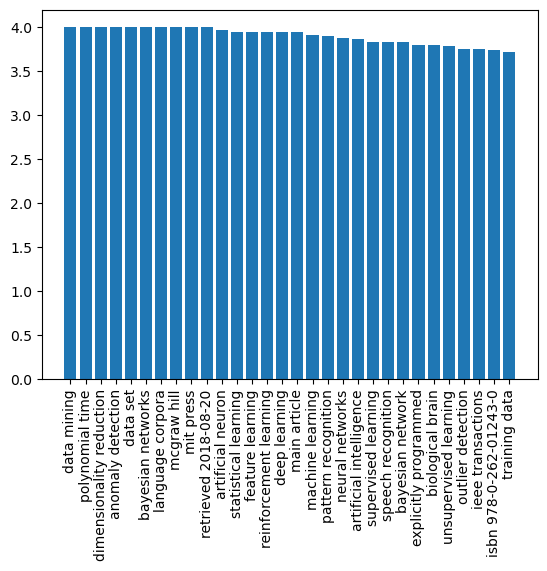

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Il existe cependant une manière encore meilleure de visualiser les fréquences des mots - en utilisant **Word Cloud**. Nous devrons installer une autre bibliothèque pour tracer le nuage de mots à partir de notre liste de mots-clés.


In [71]:
!{sys.executable} -m pip install wordcloud

L'objet `WordCloud` est responsable de prendre soit le texte original, soit une liste pré-calculée de mots avec leurs fréquences, et retourne une image, qui peut ensuite être affichée à l'aide de `matplotlib` :


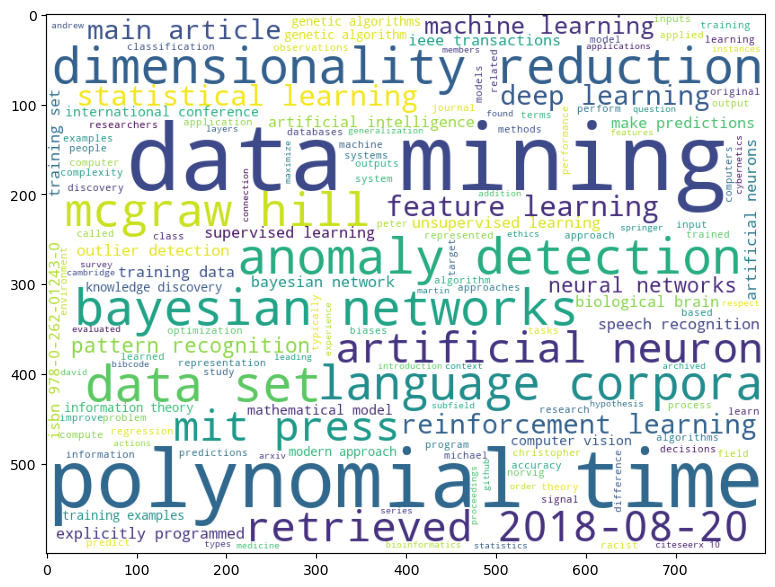

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Nous pouvons également passer le texte original à `WordCloud` - voyons si nous pouvons obtenir un résultat similaire :


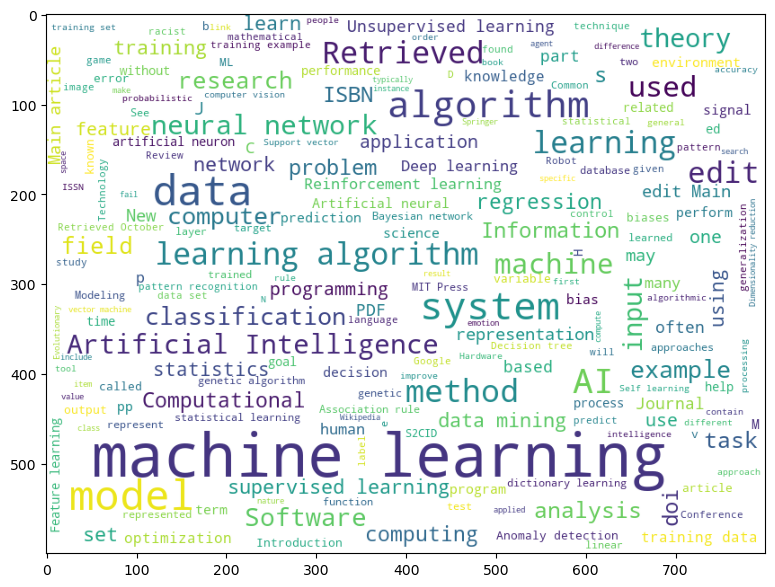

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Vous pouvez voir que le nuage de mots est maintenant plus impressionnant, mais il contient également beaucoup de bruit (par exemple, des mots non pertinents comme `Retrieved on`). De plus, nous obtenons moins de mots-clés composés de deux mots, tels que *data scientist* ou *computer science*. Cela s'explique par le fait que l'algorithme RAKE fait un bien meilleur travail pour sélectionner de bons mots-clés à partir du texte. Cet exemple illustre l'importance du prétraitement et du nettoyage des données, car une image claire à la fin nous permettra de prendre de meilleures décisions.

Dans cet exercice, nous avons suivi un processus simple pour extraire du sens à partir d'un texte de Wikipédia, sous forme de mots-clés et de nuage de mots. Cet exemple est assez simple, mais il illustre bien toutes les étapes typiques qu'un data scientist suivra lorsqu'il travaille avec des données, en commençant par l'acquisition des données jusqu'à la visualisation.

Dans notre cours, nous discuterons en détail de toutes ces étapes.



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de recourir à une traduction professionnelle réalisée par un humain. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
